In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
print("Current launch location: ", os.getcwd())

Current launch location:  d:\ing3\Compression-video\TVID-Project\src


In [6]:
filename = "../data/elementary/lci/430.pgm"

with open(filename, "rb") as f:
    # read the header
    header = f.readline()
    assert header == b"P5\n"

    # read the size
    size = f.readline()
    width, height = [int(x) for x in size.split()]

    # read the max value
    maxval = f.readline()
    assert maxval == b"255\n"

    # read the data
    data = f.read()

    # convert the data to a numpy array
    img = np.frombuffer(data, dtype=np.uint8)
    img = img.reshape((height, width))

Image size:  (864, 720)


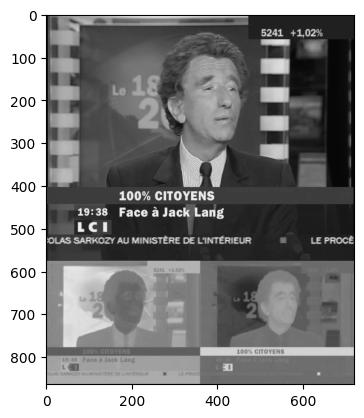

In [55]:
img = plt.imread(filename).astype(np.uint8)
print("Image size: ", img.shape)
plt.imshow(img, cmap="gray")

In [68]:
def read_yuv_pgm(img, width, height):
    """
    Reads a YUV PGM file into a np array.
    """
    y_width = width
    y_height = height * 2 // 3
    uv_width = width // 2

    y = img[:y_height, :y_width]

    u = img[y_height:, :uv_width]
    v = img[y_height:, uv_width:]

    u = np.repeat(u, 2, axis=0)
    v = np.repeat(v, 2, axis=0)

    u = np.repeat(u, 2, axis=1)
    v = np.repeat(v, 2, axis=1)

    return np.dstack((y, u, v)).astype(np.uint8)

YUV_img = read_yuv_pgm(img, width, height)
print("YUV image size: ", YUV_img.shape)

YUV image size:  (576, 720, 3)


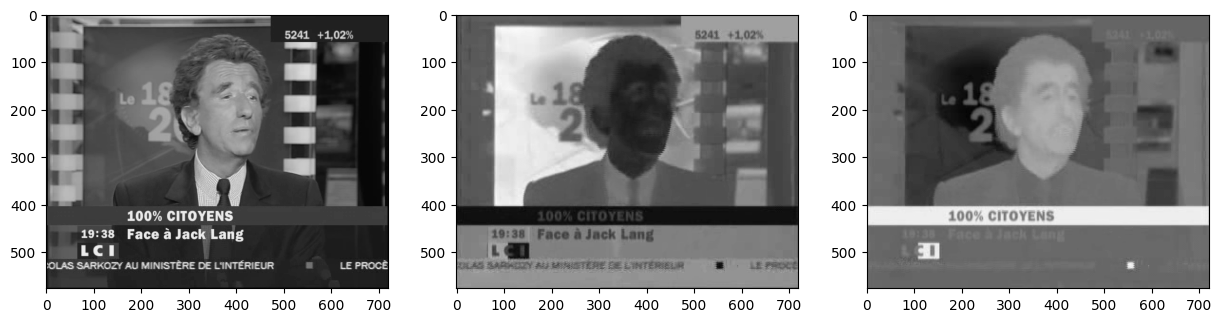

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(YUV_img[:, :, 0], cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(YUV_img[:, :, 1], cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(YUV_img[:, :, 2], cmap="gray")

YUV values at (410, 100):
Y:  67.0
U:  99.0
V:  212.0
RGB values at (410, 100):
R:  184.768
G:  16.99252
B:  15.6119995


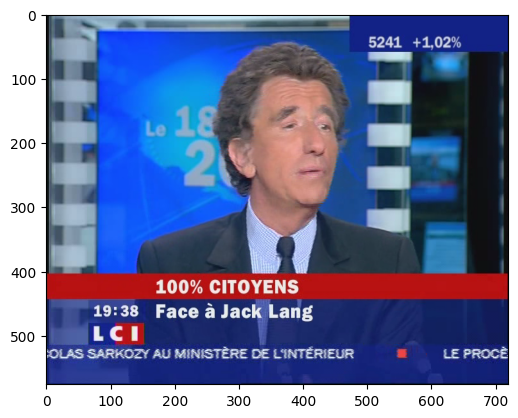

In [74]:
def yuv_to_rgb(yuv_img):
    """
    Converts a YUV image to RGB.
    """
    y = yuv_img[:, :, 0].astype(np.float32)
    u = yuv_img[:, :, 1].astype(np.float32)
    v = yuv_img[:, :, 2].astype(np.float32)

    r = np.clip(y + 1.402 * (v - 128), 0, 255)
    g = np.clip(y - 0.344136 * (u - 128) - 0.714136 * (v - 128), 0, 255)
    b = np.clip(y + 1.772 * (u - 128), 0, 255)

    return np.stack((r, g, b), axis=-1).astype(np.uint8)

RGB_img = yuv_to_rgb(YUV_img)
plt.imshow(RGB_img)